In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r'C:\thesis\datasets.csv')
df2 = pd.read_csv(r'C:\thesis\datasets.csv')
df

,student_id,age,sex,course,yr_level,socioeconomic_stat,fam_support,working_stud,scholar,personality_type,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
0,2021-01592,19.0,F,CD,2,low,yes,no,yes,ISTJ,...,never,always,always,sometimes,always,always,sometimes,sometimes,1.5588,2
1,2021-02910,19.0,F,CD,2,lower middle,yes,no,no,ESFJ,...,sometimes,sometimes,sometimes,sometimes,sometimes,sometimes,sometimes,sometimes,1.3824,2
2,2021-02862,19.0,F,CD,2,low,yes,no,no,ENTP,...,always,never,always,sometimes,sometimes,always,sometimes,sometimes,1.5882,2
3,2021-02890,19.0,F,CD,2,lower middle,yes,yes,no,ESFJ,...,always,sometimes,never,sometimes,sometimes,sometimes,always,sometimes,1.5000,2
4,2020-04136,20.0,F,CD,2,low,yes,no,no,ISFJ,...,sometimes,never,sometimes,sometimes,never,sometimes,sometimes,always,1.4347,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-00476,21.0,F,SW,2,lower middle,yes,no,no,ISFP,...,always,sometimes,never,never,Sometimes,sometimes,sometimes,never,1.9559,3
353,2021-01868,20.0,F,SW,2,low,yes,yes,no,ISFP,...,always,never,sometimes,sometimes,Sometimes,always,sometimes,never,1.5294,2
354,2021-01891,19.0,F,SW,2,low,yes,no,no,ENFJ,...,always,never,always,never,always,sometimes,sometimes,sometimes,1.7647,3
355,2021-01897,19.0,F,SW,2,low,yes,no,no,ISFP,...,always,always,sometimes,never,always,always,sometimes,never,1.4853,2


# DATA EXPLORATION

In [3]:
#Dimension of the raw dataframe
print("Dimension of the data raw dataframe Rows by Columns, ", df.shape)

Dimension of the data raw dataframe Rows by Columns,  (357, 51)


In [4]:
#check Dataframe with null values
df2.isna().sum()

student_id             0
age                   11
sex                    6
course                 0
yr_level               0
socioeconomic_stat     0
fam_support            0
working_stud           0
scholar                0
personality_type       0
TM1                    0
TM2                    0
TM3                    0
TM4                    0
TM5                    0
TM6                    0
TM7                    0
CAP1                   0
CAP2                   0
CAP3                   1
CAP4                   0
GSS1                   0
GSS2                   0
GSS3                   0
GSS4                   0
GSS5                   0
GSS6                   0
GSS7                   0
EP1                    0
EP2                    0
EP3                    0
EP4                    0
EP5                    0
EP6                    0
NT1                    0
NT2                    0
NT3                    0
desktop                0
laptop                 0
mobile_phone           0


In [5]:
df.describe()

,age,yr_level,GPA,gpa_range
count,346.000000,357.000000,357.000000,357.000000
mean,20.462428,2.851541,1.918353,2.801120
std,1.520880,0.740353,0.446958,0.829376
min,10.000000,2.000000,1.197900,1.000000
25%,20.000000,2.000000,1.586500,2.000000
50%,20.000000,3.000000,1.855800,3.000000
75%,21.000000,3.000000,2.148700,3.000000
max,29.000000,4.000000,4.368400,6.000000


# DATA CLEANING

In [6]:
#Check Sex consistency
print("Sex Attributes :" ,df2.sex.unique())
print("""  Justification  There are 4 attribute exsting inside Sex. We should replace the values with 
                             precise input for consistency.""""" )

#checking missing value for sex
print("\nNumber of missing values of Sex","[" ,df2.sex.isna().sum(), "]")

#Replace Sex value with a precise value 'S' and 'M' and Fill values
df["sex"].replace("M ", "M", inplace = True)
df["sex"].replace("F ", "F", inplace = True)
df["sex"].fillna(method="ffill", inplace=True)

#Check uniqueness of Sex
print("\nUpdated Attributes inside Sex : " ,df["sex"].unique())

print("\nNumber of missing values of Sex","[" ,df.sex.isna().sum(), "]")

#Values of each attribute for Sex
valueCounts_MaleFemale = df.sex.value_counts()
valueCounts_MaleFemale


Sex Attributes : ['F' 'M' nan 'M ' 'F ']
  Justification  There are 4 attribute exsting inside Sex. We should replace the values with 
                             precise input for consistency.

Number of missing values of Sex [ 6 ]

Updated Attributes inside Sex :  ['F' 'M']

Number of missing values of Sex [ 0 ]


F    198
M    159
Name: sex, dtype: int64

In [7]:
#Check uniqueness for age
Age_Unique = df.age.sort_values().unique()
Age_Unique

array([10., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       nan])

In [8]:
#Check for missing values for age
AgeMissing = df2["age"].isna().sum()
print("\nNumber of missing value of age : ", AgeMissing, " missing")

#Filling missing values for age with mean.
df.age.fillna(df["age"].mean(), inplace = True)

#Check for missing values for age
print("\nNumber of missing value of age : ", df["age"].isna().sum(), " missing")


Number of missing value of age :  11  missing

Number of missing value of age :  0  missing


In [9]:
#fill missing values for CAP3
df["CAP3"].fillna(method="ffill", inplace = True)
print("\nNumber of missing value of CAP3 : ", df["CAP3"].isna().sum())


Number of missing value of CAP3 :  0


In [10]:
print("Dataframe has no missing value")
df.isna().sum()

Dataframe has no missing value


student_id            0
age                   0
sex                   0
course                0
yr_level              0
socioeconomic_stat    0
fam_support           0
working_stud          0
scholar               0
personality_type      0
TM1                   0
TM2                   0
TM3                   0
TM4                   0
TM5                   0
TM6                   0
TM7                   0
CAP1                  0
CAP2                  0
CAP3                  0
CAP4                  0
GSS1                  0
GSS2                  0
GSS3                  0
GSS4                  0
GSS5                  0
GSS6                  0
GSS7                  0
EP1                   0
EP2                   0
EP3                   0
EP4                   0
EP5                   0
EP6                   0
NT1                   0
NT2                   0
NT3                   0
desktop               0
laptop                0
mobile_phone          0
tablet                0
wifi            

In [11]:
df.socioeconomic_stat.unique()

array(['low', 'lower middle', 'middle', 'upper middle', 'low ',
       'Upper but not rich', 'rich', 'lower'], dtype=object)

# RECONSTRUCTING VALUES INSIDE COLUMNS

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          357 non-null    object 
 1   age                 357 non-null    float64
 2   sex                 357 non-null    object 
 3   course              357 non-null    object 
 4   yr_level            357 non-null    int64  
 5   socioeconomic_stat  357 non-null    object 
 6   fam_support         357 non-null    object 
 7   working_stud        357 non-null    object 
 8   scholar             357 non-null    object 
 9   personality_type    357 non-null    object 
 10  TM1                 357 non-null    object 
 11  TM2                 357 non-null    object 
 12  TM3                 357 non-null    object 
 13  TM4                 357 non-null    object 
 14  TM5                 357 non-null    object 
 15  TM6                 357 non-null    object 
 16  TM7     

In [13]:
#PRINT UNIQUENESS 
print(" Unique of age : ", df2["age"].unique(), "\n")
print(" Unique of sex : ", df2["sex"].unique(), "\n")
print(" Unique of course : ", df2["course"].unique(), "\n")
print(" Unique of yr_level: ", df2["yr_level"].unique(), "\n")
print(" Unique of socioeconomic_stat : ", df2["socioeconomic_stat"].unique(), "\n")
print(" Unique of fam_support : ", df2["fam_support"].unique(), "\n")
print(" Unique of working_stud : ", df2["working_stud"].unique(), "\n")
print(" Unique of scholar : ", df2["scholar"].unique(), "\n")
print(" Unique of personality_type : ", df2["personality_type"].unique(), "\n")
print(" Unique of TM1 : ", df2["TM1"].unique(), "\n")
print(" Unique of TM2 : ", df2["TM2"].unique(), "\n")
print(" Unique of TM3 : ", df2["TM3"].unique(), "\n")
print(" Unique of TM4 : ", df2["TM4"].unique(), "\n")
print(" Unique of TM5 : ", df2["TM5"].unique(), "\n")
print(" Unique of TM6 : ", df2["TM6"].unique(), "\n")
print(" Unique of TM7 : ", df2["TM7"].unique(), "\n")
print(" Unique of CAP1 : ", df2["CAP1"].unique(), "\n")
print(" Unique of CAP2 : ", df2["CAP2"].unique(), "\n")
print(" Unique of CAP3 : ", df2["CAP3"].unique(), "\n")
print(" Unique of CAP4 : ", df2["CAP4"].unique(), "\n")
print(" Unique of GSS1 : ", df2["GSS1"].unique(), "\n")
print(" Unique of GSS2 : ", df2["GSS2"].unique(), "\n")
print(" Unique of GSS3 : ", df2["GSS3"].unique(), "\n")
print(" Unique of GSS4 : ", df2["GSS4"].unique(), "\n")
print(" Unique of GSS5 : ", df2["GSS5"].unique(), "\n")
print(" Unique of GSS6 : ", df2["GSS6"].unique(), "\n")
print(" Unique of GSS7 : ", df2["GSS7"].unique(), "\n")
print(" Unique of EP1 : ", df2["EP1"].unique(), "\n")
print(" Unique of EP2 : ", df2["EP2"].unique(), "\n")
print(" Unique of EP3 : ", df2["EP3"].unique(), "\n")
print(" Unique of EP4 : ", df2["EP4"].unique(), "\n")
print(" Unique of EP5 : ", df2["EP5"].unique(), "\n")
print(" Unique of EP6 : ", df2["EP6"].unique(), "\n")
print(" Unique of NT1 : ", df2["NT1"].unique(), "\n")
print(" Unique of NT2 : ", df2["NT2"].unique(), "\n")
print(" Unique of NT3 : ", df2["NT3"].unique(), "\n")
print(" Unique of desktop : ", df2["desktop"].unique(), "\n")
print(" Unique of laptop : ", df2["laptop"].unique(), "\n")
print(" Unique of mobile_phone : ", df2["mobile_phone"].unique(), "\n")
print(" Unique of tablet : ", df2["tablet"].unique(), "\n")
print(" Unique of wifi : ", df2["wifi"].unique(), "\n")
print(" Unique of prepaid-wifi : ", df2["prepaid-wifi"].unique(), "\n")
print(" Unique of cellular_data : ", df2["cellular_data"].unique(), "\n")
print(" Unique of hotspot : ", df2["hotspot"].unique(), "\n")
print(" Unique of vhigh_speed : ", df2["vhigh_speed"].unique(), "\n")
print(" Unique of high_speed : ", df2["high_speed"].unique(), "\n")
print(" Unique of moderate_speed : ", df2["moderate_speed"].unique(), "\n")
print(" Unique of light_speed : ", df2["light_speed"].unique(), "\n")


 Unique of age :  [19. 20. 21. 25. 18. nan 22. 27. 24. 23. 29. 28. 10. 26.] 

 Unique of sex :  ['F' 'M' nan 'M ' 'F '] 

 Unique of course :  ['CD' 'IT' 'CS' 'SW'] 

 Unique of yr_level:  [2 3 4] 

 Unique of socioeconomic_stat :  ['low' 'lower middle' 'middle' 'upper middle' 'low ' 'Upper but not rich'
 'rich' 'lower'] 

 Unique of fam_support :  ['yes' 'no'] 

 Unique of working_stud :  ['no' 'yes'] 

 Unique of scholar :  ['yes' 'no'] 

 Unique of personality_type :  ['ISTJ' 'ESFJ' 'ENTP' 'ISFJ' 'ENFJ' 'INFJ' 'ISFP' 'INTJ' 'ENTJ' 'ESTP'
 'INFP' 'ESFP' 'ESTJ' 'ENFP' 'ISTP' 'INTP'] 

 Unique of TM1 :  ['always' 'sometimes' 'never' 'sometime' 'Sometimes' 'sometimesom'
 'sometiems'] 

 Unique of TM2 :  ['sometimes' 'never' 'always'] 

 Unique of TM3 :  ['sometimes' 'always' 'never'] 

 Unique of TM4 :  ['always' 'sometimes' 'never'] 

 Unique of TM5 :  ['always' 'sometimes' 'never'] 

 Unique of TM6 :  ['always' 'sometimes' 'never' 'sometime' 'sometimess' 'someyimes'] 

 Unique of TM7 

       JUSTIFICATION :
           Columns that REQUIRES replacing unwanted values;
              TM1 -> ['always' 'sometimes' 'never' 'sometime' 'Sometimes' 'sometimesom' 'sometiems'] 
              TM6 ->  ['always' 'sometimes' 'never' 'sometime' 'sometimess' 'someyimes']
              CAP1 -> ['always' 'sometimes' 'Always' 'never'] 
              CAP2 -> ['always' 'sometimes' 'Sometimes' 'never' 'sometimesnever' 's'] 
              GSS5 -> ['always' 'sometimes' 'Sometimes' 'never' 'sometimes ' 'sometime'] 
              tablet -> ['never' 'sometimes' 'an' 'always']
              prepaid-wifi -> ['always' 'sometimes' 'never' 'Sometimes'] 
              vhigh_speed -> ['always' 'sometimes' 'never' 'Sometimes'] 
              high_speed -> ['always' 'sometimes' 'never' 'high'] 
              moderate_speed -> ['sometimes' 'always' 'never' 'moderate'] 
                
       **THE FF. INPUTS WAS NOT CONSISTENT**    

In [14]:
#Replacing unwanted values
df.replace({
            'socioeconomic_stat' : {'low ':'low', 'lower':'low'},
            'TM1' : {'sometime':'sometimes',
                     'Sometimes':'sometimes',
                     'sometimesom':'sometimes',
                     'sometiems':'sometimes'
                    },
            'TM6' : {'sometime':'sometimes',
                     'sometimess':'sometimes',
                     'someyimes':'sometimes'
                    },
            'CAP1' : {'Always':'always'},
            'CAP2' : {'Sometimes':'sometimes',
                      'sometimesnever':'sometimes',
                      's':'sometimes'
                     },
            'GSS5' : {'Sometimes':'sometimes',
                      'sometimes ':'sometimes', 
                      'sometime':'sometimes'},
            'tablet' : {'an':'always'},
            'prepaid-wifi' : {'Sometimes':'sometimes'},
            'vhigh_speed' : {'Sometimes':'sometimes'},
            'high_speed' : {'high':'always'},
            'moderate_speed' : {'moderate':'sometimes'}
           }, inplace=True)

In [15]:
print("Updated Uniqueness of socioeconomic_stat : ", df["socioeconomic_stat"].unique(), "\n")
print("Updated Uniqueness of TM1 : ", df["TM1"].unique(),"\n")
print("Updated Uniqueness of TM6 : ", df["TM6"].unique(),"\n")
print("Updated Uniqueness of CAP1 : ", df["CAP1"].unique(),"\n")
print("Updated Uniqueness of CAP2 : ", df["CAP2"].unique(),"\n")
print("Updated Uniqueness of GSS5 : ", df["GSS5"].unique(),"\n")
print("Updated Uniqueness of prepaid-wifi : ", df["prepaid-wifi"].unique(),"\n")
print("Updated Uniqueness of vhigh_speed : ", df["vhigh_speed"].unique(),"\n")
print("Updated Uniqueness of high_speed : ", df["high_speed"].unique(),"\n")
print("Updated Uniqueness of moderate_speed : ", df["moderate_speed"].unique(),"\n")

Updated Uniqueness of socioeconomic_stat :  ['low' 'lower middle' 'middle' 'upper middle' 'Upper but not rich' 'rich'] 

Updated Uniqueness of TM1 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of TM6 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of CAP1 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of CAP2 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of GSS5 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of prepaid-wifi :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of vhigh_speed :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of high_speed :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of moderate_speed :  ['sometimes' 'always' 'never'] 



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          357 non-null    object 
 1   age                 357 non-null    float64
 2   sex                 357 non-null    object 
 3   course              357 non-null    object 
 4   yr_level            357 non-null    int64  
 5   socioeconomic_stat  357 non-null    object 
 6   fam_support         357 non-null    object 
 7   working_stud        357 non-null    object 
 8   scholar             357 non-null    object 
 9   personality_type    357 non-null    object 
 10  TM1                 357 non-null    object 
 11  TM2                 357 non-null    object 
 12  TM3                 357 non-null    object 
 13  TM4                 357 non-null    object 
 14  TM5                 357 non-null    object 
 15  TM6                 357 non-null    object 
 16  TM7     

# TRANSFORMING DATA

In [17]:
from category_encoders import OrdinalEncoder
Select_StudInfo_MBTIFeatures = df.iloc[:, [0,1,2,3,4,9]]
maplist = [{'col' : 'sex' , 'mapping' : { 'F' : 0 , 'M' : 1}},
           {'col' : 'course' , 'mapping' : { 'CD':1, 'IT':2, 'CS':3 , 'SW':4}},
           {'col' : 'personality_type' , 'mapping' : {'ISTJ':0, 'ESFJ':1, 'ENTP':2, 'ISFJ':3, 'ENFJ':4, 'INFJ':5, 'ISFP':6, 'INTJ':7,
       'ENTJ':8, 'ESTP':9, 'INFP':10, 'ESFP':11, 'ESTJ':12, 'ENFP':13, 'ISTP':14, 'INTP':15}}]
oeStudentInfo = OrdinalEncoder(mapping=maplist)
StudInfo_DF = oeStudentInfo.fit_transform(Select_StudInfo_MBTIFeatures)

In [18]:
StudInfo_DF.personality_type.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [19]:
Select_demographicFeatures = df.iloc[:, [5, 6, 7, 8]]
maplist = [{'col' : 'socioeconomic_stat', 
            'mapping' : {'low' : 1 ,'lower middle' : 2 ,'middle' : 3, 'upper middle': 4, 'Upper but not rich' : 5,  'rich' :6}},
           {'col' : 'fam_support', 
                    'mapping' : {'yes' : 1, 'no' : 0}},
           {'col' : 'scholar',
                    'mapping' : {'yes' : 1, 'no' : 0}},
           {'col' : 'working_stud', 
                    'mapping' : {'yes' : 1, 'no' : 0}}]
oeDic = OrdinalEncoder(mapping=maplist)
DiFeatures_DF = oeDic.fit_transform(Select_demographicFeatures)

In [20]:
Select_Tri_ValFeatures = df.iloc[:, 10 : 51]
maplist = [{'col' : 'TM1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM7', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS7', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'desktop', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'laptop', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'mobile_phone', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'tablet', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'wifi', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'prepaid-wifi', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'cellular_data', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'hotspot', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'vhigh_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'high_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'moderate_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'light_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}}]

oeTri = OrdinalEncoder(mapping=maplist)
TriFeatures_DF = oeTri.fit_transform(Select_Tri_ValFeatures)

# DATAFRAME CONCATINATION

In [21]:
newDF =  pd.concat([StudInfo_DF, DiFeatures_DF,TriFeatures_DF], axis=1)
newDF

,student_id,age,sex,course,yr_level,personality_type,socioeconomic_stat,fam_support,working_stud,scholar,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
0,2021-01592,19.0,0,1,2,0,1,1,0,1,...,3,1,1,2,1,1,2,2,1.5588,2
1,2021-02910,19.0,0,1,2,1,2,1,0,0,...,2,2,2,2,2,2,2,2,1.3824,2
2,2021-02862,19.0,0,1,2,2,1,1,0,0,...,1,3,1,2,2,1,2,2,1.5882,2
3,2021-02890,19.0,0,1,2,1,2,1,1,0,...,1,2,3,2,2,2,1,2,1.5000,2
4,2020-04136,20.0,0,1,2,3,1,1,0,0,...,2,3,2,2,3,2,2,1,1.4347,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-00476,21.0,0,4,2,6,2,1,0,0,...,1,2,3,3,2,2,2,3,1.9559,3
353,2021-01868,20.0,0,4,2,6,1,1,1,0,...,1,3,2,2,2,1,2,3,1.5294,2
354,2021-01891,19.0,0,4,2,4,1,1,0,0,...,1,3,1,3,1,2,2,2,1.7647,3
355,2021-01897,19.0,0,4,2,6,1,1,0,0,...,1,1,2,3,1,1,2,3,1.4853,2


In [22]:
newDF.personality_type.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [23]:
#newDF = newDF.join(df_pt)
#newDF

In [24]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          357 non-null    object 
 1   age                 357 non-null    float64
 2   sex                 357 non-null    int32  
 3   course              357 non-null    int32  
 4   yr_level            357 non-null    int64  
 5   personality_type    357 non-null    int32  
 6   socioeconomic_stat  357 non-null    int32  
 7   fam_support         357 non-null    int32  
 8   working_stud        357 non-null    int32  
 9   scholar             357 non-null    int32  
 10  TM1                 357 non-null    int32  
 11  TM2                 357 non-null    int32  
 12  TM3                 357 non-null    int32  
 13  TM4                 357 non-null    int32  
 14  TM5                 357 non-null    int32  
 15  TM6                 357 non-null    int32  
 16  TM7     

In [25]:
newDF.head(10)

,student_id,age,sex,course,yr_level,personality_type,socioeconomic_stat,fam_support,working_stud,scholar,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
0,2021-01592,19.0,0,1,2,0,1,1,0,1,...,3,1,1,2,1,1,2,2,1.5588,2
1,2021-02910,19.0,0,1,2,1,2,1,0,0,...,2,2,2,2,2,2,2,2,1.3824,2
2,2021-02862,19.0,0,1,2,2,1,1,0,0,...,1,3,1,2,2,1,2,2,1.5882,2
3,2021-02890,19.0,0,1,2,1,2,1,1,0,...,1,2,3,2,2,2,1,2,1.5000,2
4,2020-04136,20.0,0,1,2,3,1,1,0,0,...,2,3,2,2,3,2,2,1,1.4347,2
5,2020-02817,21.0,0,1,2,4,1,1,0,0,...,1,3,1,3,2,2,2,1,2.2500,4
6,2021-02734,19.0,0,1,2,0,1,1,0,0,...,2,3,2,3,3,3,2,3,1.5000,2
7,2021-01674,21.0,0,1,2,5,1,0,1,0,...,1,2,2,2,2,2,2,2,1.5294,2
8,2021-01715,19.0,0,1,2,6,1,1,0,0,...,2,2,2,2,2,2,2,2,1.7206,2
9,2021-01769,19.0,0,1,2,3,1,1,0,0,...,3,3,1,3,3,3,2,1,1.5000,2


# DESCRIPTIVE VISUALIZATION

In [26]:
course_popu = pd.pivot_table(newDF, values="student_id", index="course",aggfunc="count")
course_popu

,student_id
course,
1,75
2,123
3,109
4,50


In [27]:
PersonalityPopu = newDF.groupby('sex')[["fam_support"]].value_counts()
PersonalityPopu

sex  fam_support
0    1              191
     0                7
1    1              153
     0                6
dtype: int64

In [28]:
DiFeatures_DF.corr()

,socioeconomic_stat,fam_support,working_stud,scholar
socioeconomic_stat,1.000000,-0.064396,0.017799,0.001173
fam_support,-0.064396,1.000000,-0.305185,-0.023546
working_stud,0.017799,-0.305185,1.000000,0.077603
scholar,0.001173,-0.023546,0.077603,1.000000


In [29]:
StudInfo_DF.corr()

,age,sex,course,yr_level,personality_type
age,1.000000,-0.008345,0.073705,0.458607,0.032515
sex,-0.008345,1.000000,0.095132,-0.025881,0.073796
course,0.073705,0.095132,1.000000,0.042690,0.111371
yr_level,0.458607,-0.025881,0.042690,1.000000,-0.005072
personality_type,0.032515,0.073796,0.111371,-0.005072,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'course'}>,
        <AxesSubplot:title={'center':'yr_level'}>,
        <AxesSubplot:title={'center':'personality_type'}>,
        <AxesSubplot:title={'center':'socioeconomic_stat'}>,
        <AxesSubplot:title={'center':'fam_support'}>],
       [<AxesSubplot:title={'center':'working_stud'}>,
        <AxesSubplot:title={'center':'scholar'}>,
        <AxesSubplot:title={'center':'TM1'}>,
        <AxesSubplot:title={'center':'TM2'}>,
        <AxesSubplot:title={'center':'TM3'}>,
        <AxesSubplot:title={'center':'TM4'}>,
        <AxesSubplot:title={'center':'TM5'}>],
       [<AxesSubplot:title={'center':'TM6'}>,
        <AxesSubplot:title={'center':'TM7'}>,
        <AxesSubplot:title={'center':'CAP1'}>,
        <AxesSubplot:title={'center':'CAP2'}>,
        <AxesSubplot:title={'center':'CAP3'}>,
        <AxesSubplot:title={'center':'CAP4'}>,
        <AxesSubp

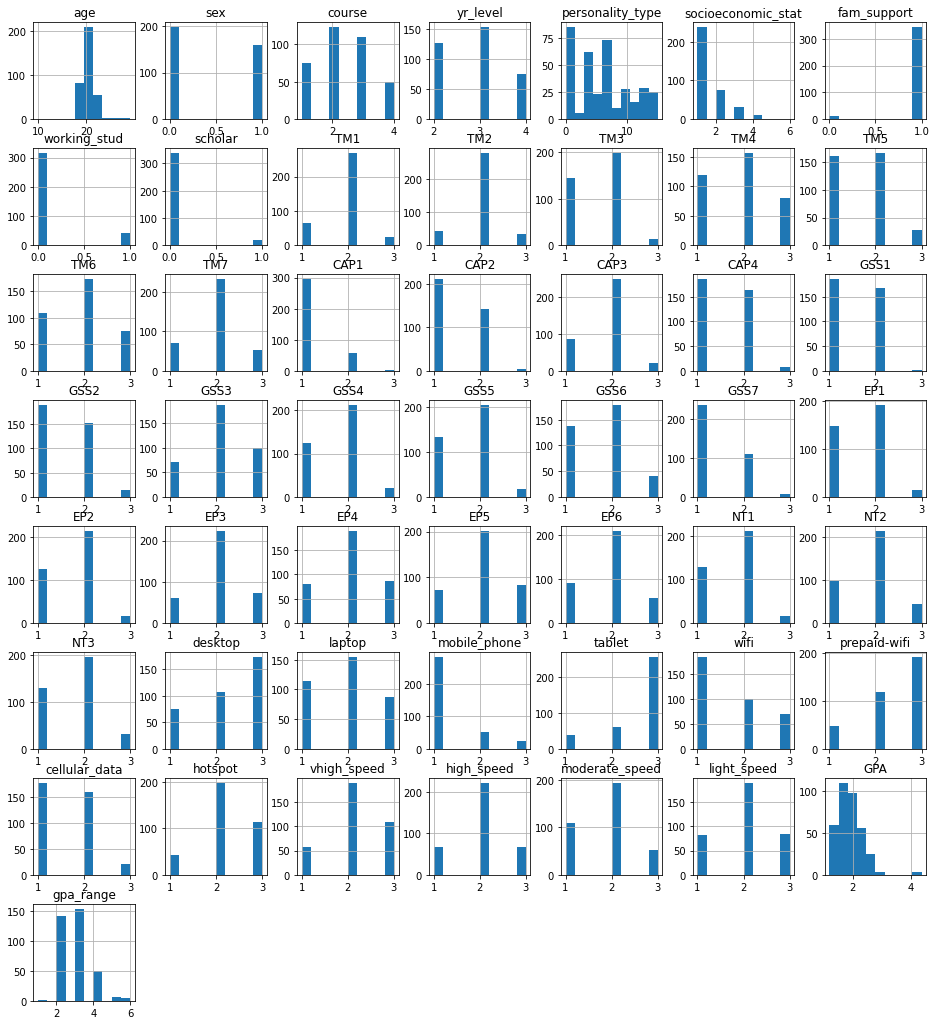

In [30]:
newDF.hist(grid=True,  figsize = (16,18))

### Dropping columns 

In [31]:
newDF.drop(columns = 'student_id', inplace=True)

In [32]:
newDF.head(10)

,age,sex,course,yr_level,personality_type,socioeconomic_stat,fam_support,working_stud,scholar,TM1,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
0,19.0,0,1,2,0,1,1,0,1,1,...,3,1,1,2,1,1,2,2,1.5588,2
1,19.0,0,1,2,1,2,1,0,0,2,...,2,2,2,2,2,2,2,2,1.3824,2
2,19.0,0,1,2,2,1,1,0,0,2,...,1,3,1,2,2,1,2,2,1.5882,2
3,19.0,0,1,2,1,2,1,1,0,2,...,1,2,3,2,2,2,1,2,1.5000,2
4,20.0,0,1,2,3,1,1,0,0,1,...,2,3,2,2,3,2,2,1,1.4347,2
5,21.0,0,1,2,4,1,1,0,0,2,...,1,3,1,3,2,2,2,1,2.2500,4
6,19.0,0,1,2,0,1,1,0,0,2,...,2,3,2,3,3,3,2,3,1.5000,2
7,21.0,0,1,2,5,1,0,1,0,2,...,1,2,2,2,2,2,2,2,1.5294,2
8,19.0,0,1,2,6,1,1,0,0,1,...,2,2,2,2,2,2,2,2,1.7206,2
9,19.0,0,1,2,3,1,1,0,0,2,...,3,3,1,3,3,3,2,1,1.5000,2


# Checking Outliers

[Text(0.5, 1.0, 'Box Plot of Scores')]

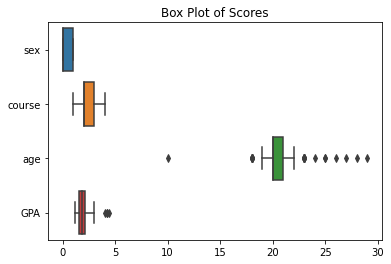

In [33]:
sns.boxplot(data=newDF[['sex', 'course', 'age', 'GPA']], orient = "h").set(title="Box Plot of Scores")

[Text(0.5, 1.0, 'Box Plot of Scores')]

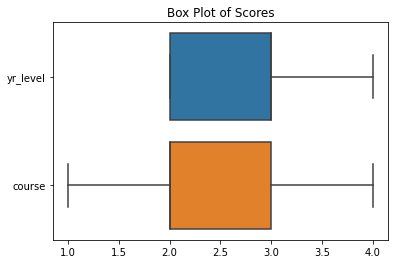

In [34]:
sns.boxplot(data=newDF[['yr_level', 'course']], orient = "h").set(title="Box Plot of Scores")

In [35]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 357 non-null    float64
 1   sex                 357 non-null    int32  
 2   course              357 non-null    int32  
 3   yr_level            357 non-null    int64  
 4   personality_type    357 non-null    int32  
 5   socioeconomic_stat  357 non-null    int32  
 6   fam_support         357 non-null    int32  
 7   working_stud        357 non-null    int32  
 8   scholar             357 non-null    int32  
 9   TM1                 357 non-null    int32  
 10  TM2                 357 non-null    int32  
 11  TM3                 357 non-null    int32  
 12  TM4                 357 non-null    int32  
 13  TM5                 357 non-null    int32  
 14  TM6                 357 non-null    int32  
 15  TM7                 357 non-null    int32  
 16  CAP1    

In [36]:
selectstud = df.loc[df["age"]==10, "student_id"]
selectstud

222    2021-00344
Name: student_id, dtype: object

[Text(0.5, 1.0, 'Box Plot of Scores')]

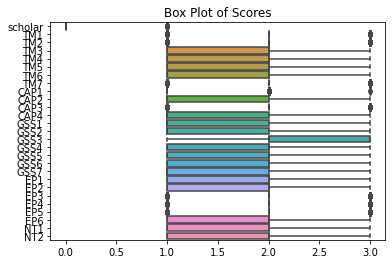

In [37]:
sns.boxplot(data=newDF.iloc[:, 8:35], orient = "h").set(title="Box Plot of Scores")

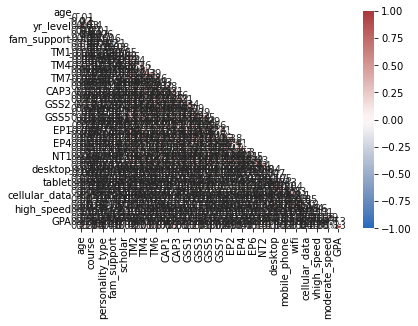

In [38]:
matrix = newDF.corr(method = 'pearson', min_periods = 1).round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [39]:
features=newDF.columns[0:-1].values
features

array(['age', 'sex', 'course', 'yr_level', 'personality_type',
       'socioeconomic_stat', 'fam_support', 'working_stud', 'scholar',
       'TM1', 'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2',
       'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6',
       'GSS7', 'EP1', 'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2',
       'NT3', 'desktop', 'laptop', 'mobile_phone', 'tablet', 'wifi',
       'prepaid-wifi', 'cellular_data', 'hotspot', 'vhigh_speed',
       'high_speed', 'moderate_speed', 'light_speed', 'GPA'], dtype=object)

In [40]:
target=newDF.columns[-1:]
target

Index(['gpa_range'], dtype='object')

## Scaling (Normalize or Standardize data)

In [41]:
#data_scaledF = DataFrame(scaler_minmax.fit_transform(newDF[features]), columns = features)
#data_scaledT = DataFrame(scaler_minmax.fit_transform(newDF[target]), columns = target)
#scaled_data = pd.concat([data_scaled, data_scaledT], axis = 1)
#scaled_data.head(5)

In [42]:
# Plot histogram of raw data
#newDF.hist(figsize=(10,9), ec="k")
#plt.title('Raw Students Data')
#plt.tight_layout()
#plt.show

## Split data to train and test dataset

In [43]:
from sklearn.model_selection import train_test_split
train, test =train_test_split(newDF, test_size=0.2, random_state=42)
train.sample(10)

,age,sex,course,yr_level,personality_type,socioeconomic_stat,fam_support,working_stud,scholar,TM1,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
158,22.0,1,3,4,3,3,1,0,0,2,...,1,2,2,3,1,2,2,2,2.4605,4
92,19.0,1,3,2,14,1,1,0,0,2,...,3,3,1,2,2,2,2,2,1.7788,3
352,21.0,0,4,2,6,2,1,0,0,2,...,1,2,3,3,2,2,2,3,1.9559,3
286,21.0,1,2,4,7,1,1,0,0,2,...,3,2,1,3,3,3,1,1,2.4844,4
231,21.0,1,2,3,13,3,1,0,0,2,...,1,2,1,2,3,1,3,3,2.6310,4
216,19.0,1,2,2,0,1,1,0,0,2,...,2,2,2,3,2,2,1,1,1.4896,2
327,26.0,0,4,3,11,1,1,0,0,1,...,1,3,1,3,2,3,3,3,1.9130,3
289,21.0,0,2,4,4,1,1,0,1,2,...,2,3,1,2,3,3,2,1,2.3438,4
212,19.0,1,2,2,12,3,1,0,0,3,...,1,3,1,2,2,2,2,1,1.5938,2
12,25.0,1,1,2,8,4,0,1,1,2,...,3,3,1,2,2,2,2,2,1.5441,2


In [44]:
train.head(5)

,age,sex,course,yr_level,personality_type,socioeconomic_stat,fam_support,working_stud,scholar,TM1,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
282,21.0,0,2,4,0,1,1,0,0,2,...,2,3,1,3,2,2,1,2,2.4375,4
333,20.0,0,4,3,5,1,1,0,0,2,...,3,3,1,2,3,3,1,3,1.5870,2
288,21.0,0,2,4,7,1,1,0,0,3,...,1,3,2,2,2,2,1,2,2.0313,3
75,21.0,0,1,4,7,1,1,0,0,2,...,1,2,2,2,2,1,2,2,1.8333,3
255,23.0,1,2,3,7,1,1,0,0,2,...,2,2,2,2,2,2,2,2,2.9881,5


In [45]:
test.head(5)

,age,sex,course,yr_level,personality_type,socioeconomic_stat,fam_support,working_stud,scholar,TM1,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
222,10.0,0,2,2,3,2,1,0,0,3,...,2,3,1,3,3,2,1,1,1.5313,2
42,22.0,0,1,3,3,1,1,0,0,2,...,3,2,1,3,2,1,2,3,1.9231,3
291,21.0,0,2,4,1,2,1,0,0,2,...,1,2,1,2,2,2,2,2,2.3906,3
300,21.0,1,2,4,4,1,1,0,0,2,...,2,2,1,2,2,2,1,1,2.4844,3
56,20.0,0,1,3,1,1,1,0,0,2,...,2,2,1,2,2,2,2,2,1.6058,2


In [46]:
test.shape

(72, 50)

In [47]:
train.shape

(285, 50)

In [ ]:
# Import Ensemble Bagging Regressor
from sklearn.ensemble import BaggingRegressor

#Random Forest, Decision Trees, Extra Trees, Adaboost, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LassoCV

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from numpy import mean
from numpy import std
import math

In [49]:
#load the data in the variables 
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]

In [50]:
#define the models to be used
models = dict()
models['rf'] = RandomForestRegressor()
models['dt'] = DecisionTreeRegressor()
models['etr'] = ExtraTreesRegressor()
models['ada'] = AdaBoostRegressor()
models['lso'] = LassoCV()

## Checking overfit or underfit models

### DecisionTreeRegressor

In [51]:
score=[]
regressor = DecisionTreeRegressor()

In [52]:
regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [53]:
regressor.score(X_train, Y_train),regressor.score(X_test, Y_test)

(1.0, 0.9084435401831129)

Using the DecisionTreeRegressor algo, well, the test score seems good, but the 1.0 score shows the model is overfitting!

##### >> Utilize bagging ensemble method

In [54]:
models['dt']= DecisionTreeRegressor()

In [55]:
bag_clf = BaggingRegressor(base_estimator=models['dt'], n_estimators=100,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

bag_clf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                 n_jobs=-1, random_state=42)

In [56]:
bag_clf.score(X_train,Y_train),bag_clf.score(X_test,Y_test)

(0.9886376953485795, 0.9263940996948118)

### RandomForestRegressor

In [57]:
score=[]
regressorRF = RandomForestRegressor()

In [58]:
regressorRF.fit(X_train, Y_train)

C:\Users\jcggr\AppData\Local\Temp\ipykernel_3760\2427466003.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressorRF.fit(X_train, Y_train)


RandomForestRegressor()

In [59]:
regressorRF.score(X_train, Y_train),regressorRF.score(X_test, Y_test)

(0.9910057634758193, 0.9292817904374364)

##### >> Utilize bagging ensemble method

In [60]:
models['rf'] = RandomForestRegressor()

In [61]:
bag_clf = BaggingRegressor(base_estimator=models['rf'], n_estimators=100,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

bag_clf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=100,
                 n_jobs=-1, random_state=42)

In [62]:
bag_clf.score(X_train,Y_train),bag_clf.score(X_test,Y_test)

(0.9695956697380574, 0.9108288172329604)

### Lasso Regressor

In [88]:
score=[]
regressorLSO = LassoCV()

In [90]:
regressorLSO.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [91]:
regressorLSO.score(X_train, Y_train),regressorLSO.score(X_test, Y_test)

(0.8232755594531066, 0.8347401485316958)

##### >> Utilize bagging ensemble method

In [92]:
models['lso'] = LassoCV()

In [93]:
bag_clf = BaggingRegressor(base_estimator=models['lso'], n_estimators=100,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

bag_clf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=LassoCV(), n_estimators=100, n_jobs=-1,
                 random_state=42)

In [94]:
bag_clf.score(X_train,Y_train),bag_clf.score(X_test,Y_test)

(0.8239444005057299, 0.8308490074366335)

### ExtraTreesRegressor

In [69]:
score=[]
regressorET = ExtraTreesRegressor()

In [70]:
regressorET.fit(X_train, Y_train)

C:\Users\jcggr\AppData\Local\Temp\ipykernel_3760\1715063309.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressorET.fit(X_train, Y_train)


ExtraTreesRegressor()

In [71]:
regressorET.score(X_train, Y_train),regressorKNN.score(X_test, Y_test)

(1.0, 0.17086469989827058)

##### >> Utilize bagging ensemble method

In [72]:
models['etr']= ExtraTreesRegressor(n_estimators = 100)

In [73]:
bag_clf = BaggingRegressor(base_estimator=models['etr'], n_estimators=100,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

bag_clf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=ExtraTreesRegressor(), n_estimators=100,
                 n_jobs=-1, random_state=42)

In [74]:
bag_clf.score(X_train,Y_train),bag_clf.score(X_test,Y_test)

(0.981439678247497, 0.8856941303153611)

### AdaBoostRegressor

In [75]:
score=[]
regressorADA = AdaBoostRegressor()

In [76]:
regressorADA.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor()

In [77]:
regressorADA.score(X_train, Y_train),regressorADA.score(X_test, Y_test)

(0.9404204135432099, 0.9237510061476734)

##### >> Utilize bagging ensemble method

In [78]:
models['ada'] = AdaBoostRegressor()

In [79]:
bag_clf = BaggingRegressor(base_estimator=models['ada'], n_estimators=100,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

bag_clf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=AdaBoostRegressor(), n_estimators=100,
                 n_jobs=-1, random_state=42)

In [80]:
bag_clf.score(X_train,Y_train),bag_clf.score(X_test,Y_test)

(0.9553121058097329, 0.9296486253542221)

# Check algorithms and apply the bagging ensemble method

In [95]:
rf = RandomForestRegressor()
lso = LassoCV()
dt = DecisionTreeRegressor()
etr = ExtraTreesRegressor()
ada = AdaBoostRegressor()

clf_array = [rf, lso, dt, etr, ada]

estimators = []
for clf in clf_array:
    cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
    scores = cross_val_score(clf, X_train, Y_train, cv=cv, n_jobs = 1, error_score = 'raise')
    bagging_clf = BaggingRegressor(clf,max_samples=0.4, max_features=10, random_state=42)
    bagging_scores = cross_val_score(bagging_clf, X_train, Y_train, cv=cv,n_jobs=-1)
    
    print(clf, '\n5-Fold Validation Scores:\n', scores)
    print('Cross Validation Training Accuracy: %.3f (%.3f)\n' % (mean(scores), std(scores)))
    
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__,scores.mean(), scores.std()))
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__,bagging_scores.mean(), bagging_scores.std()))
    print("=====================================================================\n\n")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

RandomForestRegressor() 
5-Fold Validation Scores:
 [0.78670809 0.96546173 0.96976931 0.93150871 0.91412309]
Cross Validation Training Accuracy: 0.914 (0.067)

Mean of: 0.914, std: (+/-) 0.067 [RandomForestRegressor]
Mean of: 0.261, std: (+/-) 0.050 [Bagging RandomForestRegressor]





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d

LassoCV() 
5-Fold Validation Scores:
 [0.74819867 0.86026334 0.85236693 0.78127858 0.78426362]
Cross Validation Training Accuracy: 0.805 (0.044)

Mean of: 0.805, std: (+/-) 0.044 [LassoCV]
Mean of: 0.188, std: (+/-) 0.044 [Bagging LassoCV]



DecisionTreeRegressor() 
5-Fold Validation Scores:
 [0.73823192 0.95948827 0.95403226 0.91441441 0.83468677]
Cross Validation Training Accuracy: 0.880 (0.084)

Mean of: 0.880, std: (+/-) 0.084 [DecisionTreeRegressor]
Mean of: 0.161, std: (+/-) 0.076 [Bagging DecisionTreeRegressor]





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

ExtraTreesRegressor() 
5-Fold Validation Scores:
 [0.83230809 0.91555938 0.88986359 0.85282988 0.91854356]
Cross Validation Training Accuracy: 0.882 (0.034)

Mean of: 0.882, std: (+/-) 0.034 [ExtraTreesRegressor]
Mean of: 0.260, std: (+/-) 0.061 [Bagging ExtraTreesRegressor]





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

AdaBoostRegressor() 
5-Fold Validation Scores:
 [0.79503831 0.92616733 0.91268981 0.89621383 0.86160023]
Cross Validation Training Accuracy: 0.878 (0.047)

Mean of: 0.878, std: (+/-) 0.047 [AdaBoostRegressor]
Mean of: 0.230, std: (+/-) 0.028 [Bagging AdaBoostRegressor]





In [96]:
#Random Forest, Decision Trees, Extra Trees, Adaboost, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LassoCV

from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from numpy import mean
from numpy import std
import math

from sklearn.ensemble import VotingRegressor
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

## Let’s Vote!
Sklearn’s VotingClassifier allows you to combine different machine learning classifiers, and perform a vote on what the predicted class label(s) are for a record.

In [101]:
MoRF_BR = BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=100, bootstrap=True, n_jobs=-1, random_state=42)
MoRF_BR_bagging_scores = cross_val_score(MoRF_BR, X_train, Y_train, cv=cv,n_jobs=-1)

MoDT_BR = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,bootstrap=True, n_jobs=-1,random_state=42)
MoDT_BR_bagging_scores = cross_val_score(MoDT_BR, X_train, Y_train, cv=cv,n_jobs=-1)

MoETR_BR = BaggingRegressor(base_estimator=ExtraTreesRegressor(), n_estimators=100,bootstrap=True, n_jobs=-1,random_state=42)
MoETR_BR_bagging_scores = cross_val_score(MoETR_BR, X_train, Y_train, cv=cv,n_jobs=-1)

MoADA_BR = BaggingRegressor(base_estimator=AdaBoostRegressor(), n_estimators=100,bootstrap=True, n_jobs=-1,random_state=42)
MoADA_BR_bagging_scores = cross_val_score(MoADA_BR, X_train, Y_train, cv=cv,n_jobs=-1)

MoLSO_BR = BaggingRegressor(base_estimator=LassoCV(), n_estimators=100,bootstrap=True, n_jobs=-1,random_state=42)
MoLSO_BR_bagging_scores = cross_val_score(MoLSO_BR, X_train, Y_train, cv=cv,n_jobs=-1)

estimators = []
estimators.append(('RandomForestRegressor', MoRF_BR))
estimators.append(('DecisionTreeRegressor', MoDT_BR))
estimators.append(('ExtraTreesRegressor', MoETR_BR))
estimators.append(('AdaBoostRegressor', MoADA_BR))
estimators.append(('LassoCV', MoLSO_BR))


# create the ensemble model
ensemble = VotingRegressor(estimators)
results = model_selection.cross_val_score(ensemble, X_train, Y_train, cv=cv, scoring="r2")

print("[Bagging score] : {:0%}".format(MoRF_BR_bagging_scores.mean())," rf 5-fold cross validation : ", MoRF_BR_bagging_scores)
print("[rf std score] : ", MoRF_BR_bagging_scores.std())

print("\n[nBagging score] : {:0%}".format(MoDT_BR_bagging_scores.mean()), " dt 5-fold cross validation : ", MoDT_BR_bagging_scores)
print("[dt std score] : ", MoDT_BR_bagging_scores.std())

print("\n[Bagging score] : {:0%}".format(MoETR_BR_bagging_scores.mean()), " etr 5-fold cross validation : ", MoETR_BR_bagging_scores)
print("[etr std score] : ", MoETR_BR_bagging_scores.std())

print("\n[Bagging score] : {:0%}".format(MoADA_BR_bagging_scores.mean()), " ada 5-fold cross validation : ", MoADA_BR_bagging_scores)
print("[ada std score] : ", MoADA_BR_bagging_scores.std())

print("\n[Bagging score] : {:0%}".format(MoLSO_BR_bagging_scores.mean()), " ada 5-fold cross validation : ", MoLSO_BR_bagging_scores)
print("[lso std score] : ", MoLSO_BR_bagging_scores.std())

print("\n\nEnsemble Accuracy Score result: [{:0%}]".format(results.mean()))
print("Ensemble ST score : [{:0%}]".format(results.std()),"\n\n")
print(results)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[Bagging score] : 90.938123%  rf 5-fold cross validation :  [0.816728   0.92637066 0.95059247 0.92695651 0.9262585 ]
[rf std score] :  0.04725539422240956

[nBagging score] : 91.440537%  dt 5-fold cross validation :  [0.78657067 0.96849808 0.97132992 0.93338303 0.91224513]
[dt std score] :  0.06763572372423898

[Bagging score] : 86.693890%  etr 5-fold cross validation :  [0.83859576 0.87698676 0.8662703  0.85603206 0.89680961]
[etr std score] :  0.019575282453501548

[Bagging score] : 91.110050%  ada 5-fold cross validation :  [0.83035096 0.93716369 0.95196836 0.92018992 0.91582956]
[ada std score] :  0.04236730374433841

[Bagging score] : 80.415296%  ada 5-fold cross validation :  [0.75049585 0.86095945 0.84761763 0.78296292 0.77872895]
[lso std score] :  0.042639510355144544


Ensemble Accuracy Score result: [91.073912%]
Ensemble ST score : [3.940618%] 


[0.83778469 0.94634974 0.9448178  0.91048957 0.91425379]


In [103]:
print("estimators :\n" , estimators)

estimators :
 [('RandomForestRegressor', BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=100,
                 n_jobs=-1, random_state=42)), ('DecisionTreeRegressor', BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                 n_jobs=-1, random_state=42)), ('ExtraTreesRegressor', BaggingRegressor(base_estimator=ExtraTreesRegressor(), n_estimators=100,
                 n_jobs=-1, random_state=42)), ('AdaBoostRegressor', BaggingRegressor(base_estimator=AdaBoostRegressor(), n_estimators=100,
                 n_jobs=-1, random_state=42)), ('LassoCV', BaggingRegressor(base_estimator=LassoCV(), n_estimators=100, n_jobs=-1,
                 random_state=42))]


In [104]:
from sklearn.metrics import mean_squared_error

In [105]:
predictions = ensemble.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
pre1 = predictions.predict(X_train)

In [107]:
pre1

array([3.78309701, 2.0596342 , 3.00661221, 2.95486098, 4.84422336,
       2.06821292, 3.01148971, 3.07625286, 3.02768608, 2.03535809,
       4.79389875, 3.05040697, 2.06274579, 2.10415475, 2.06561306,
       3.85183118, 2.06570717, 2.98877443, 2.98168509, 2.10573808,
       4.82386773, 2.91149296, 3.08207777, 2.00276665, 2.0575588 ,
       2.99659594, 2.1137207 , 1.91442146, 2.02771439, 2.94097362,
       2.95937156, 3.79671518, 3.66012019, 2.05230666, 2.96461168,
       2.01836002, 3.04240206, 3.42032574, 5.76455008, 2.03355682,
       2.02054387, 3.79429803, 2.02047411, 3.52279757, 2.04430556,
       1.94894077, 2.04086826, 1.97647129, 2.92812144, 2.98888121,
       2.98090577, 3.80763669, 3.02057702, 3.7775077 , 3.02160905,
       2.98872488, 3.02424701, 3.81548038, 2.04587321, 1.95518592,
       2.0300823 , 3.52031878, 3.05580166, 3.38226362, 3.05907228,
       2.96235673, 1.98847574, 3.06859996, 1.94877254, 3.02595229,
       3.0110374 , 3.10488381, 2.0243501 , 2.88581303, 2.92346

In [108]:
mse = mean_squared_error(Y_train, pre1)

In [109]:
mse

0.021816254219003166

In [114]:
newDF.columns

Index(['age', 'sex', 'course', 'yr_level', 'personality_type',
       'socioeconomic_stat', 'fam_support', 'working_stud', 'scholar', 'TM1',
       'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2', 'CAP3',
       'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6', 'GSS7', 'EP1',
       'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2', 'NT3', 'desktop',
       'laptop', 'mobile_phone', 'tablet', 'wifi', 'prepaid-wifi',
       'cellular_data', 'hotspot', 'vhigh_speed', 'high_speed',
       'moderate_speed', 'light_speed', 'GPA', 'gpa_range'],
      dtype='object')

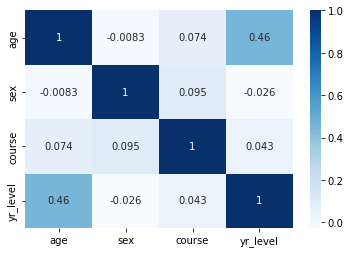

In [125]:
sns.heatmap(newDF[['age', 'sex', 'course', 'yr_level']].corr(), cmap='Blues', annot=True)
plt.show()

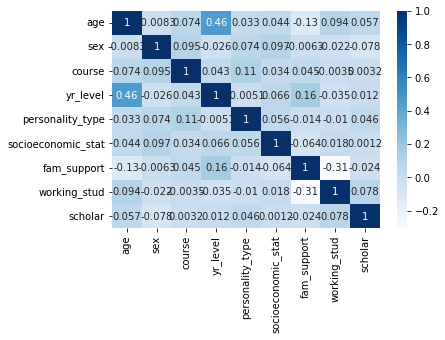

In [126]:
sns.heatmap(newDF[['age', 'sex', 'course', 'yr_level', 'personality_type',
       'socioeconomic_stat', 'fam_support', 'working_stud', 'scholar']].corr(), cmap='Blues', annot=True)
plt.show()

## Deploy trained model

In [111]:
import pickle

In [112]:
pickle.dump(ensemble, open('studenstmodel.pkl','wb'))

In [113]:
test_model = pickle.load(open('studenstmodel.pkl','rb'))

In [115]:
new_Xdata = X_test.sample(10)
new_Ydata = Y_test['gpa_range'].loc[new_Xdata.index.values]
print(new_Xdata)

           age  sex  course  yr_level  personality_type  socioeconomic_stat  \
139  21.000000    0       3         3                 7                   1   
93   22.000000    1       3         2                 7                   1   
274  19.000000    1       2         3                 0                   1   
331  20.462428    0       4         3                 0                   2   
84   19.000000    1       3         2                12                   1   
124  20.000000    1       3         3                 7                   1   
303  22.000000    1       2         4                 5                   3   
234  20.462428    1       2         3                 4                   1   
345  18.000000    0       4         2                 8                   1   
57   19.000000    0       1         3                 3                   2   

     fam_support  working_stud  scholar  TM1  ...  tablet  wifi  prepaid-wifi  \
139            1             0        0    2  ...

In [116]:
new_Ydata

139    2
93     4
274    4
331    3
84     4
124    2
303    3
234    3
345    2
57     3
Name: gpa_range, dtype: int64

In [121]:
#predictions by the model
pred = test_model.predict(new_Xdata)
print(pred)

[2.10330145 3.6307853  3.61217232 2.8966596  3.82731063 2.17509653
 2.99368181 3.0330872  2.01163627 2.97753109]


In [122]:
print(new_Ydata.values)

[2 4 4 3 4 2 3 3 2 3]


In [132]:
#checking for the accuracy score using r-squared
mse2 = mean_squared_error(new_Ydata, pred)
print('Mean Squared Error:\n', mse2)
acc = r2_score(new_Ydata, pred)
print('Accuracy Score:\n', acc)

Mean Squared Error:
 0.037033558645004655
Accuracy Score:
 0.9382774022583256
